## 🧠 什么是 Sigmoid 激活函数？

Sigmoid 是一种 S 型的激活函数，它的主要作用是：  
> **把任意实数压缩到 (0, 1) 之间，类似“概率”的形式**。

---

## ✅ 数学定义：

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

也可以写成：

$$
\sigma(x) = \frac{e^x}{e^x + 1}
$$

---

## 📈 图像形状（S 型曲线）：

- 当 $ x \to +\infty $，输出趋近于 1；
- 当 $ x \to -\infty $，输出趋近于 0；
- 当 $ x = 0 $，输出正好是 0.5；
- 输出范围：**(0, 1)**；

---

## 🧮 导数（用于反向传播）：

$$
\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))
$$

这是一个非常漂亮的公式，常用于链式求导。

---

## ✅ 优点：

- 形状平滑，输出范围固定在 (0, 1)，可以被当作“概率”理解；
- 在二分类任务中，经常用于输出层（尤其是 logistic 回归）；
- 有良好的数学性质（连续可导）。

---

## ❌ 缺点：

### 🚨 梯度消失问题：
- 当输入太大或太小时，导数趋近于 0；
- 会导致反向传播过程中，梯度更新非常慢；
- 尤其是在深层网络中表现明显。

### 📉 非零中心：
- Sigmoid 的输出在 (0,1) 之间，不以 0 为中心，容易导致梯度方向不稳定。

---

## 📌 总结一句话：

> Sigmoid 是深度学习中最早使用的激活函数之一，能把实数“挤压”成 (0, 1) 之间的值，但在深层网络中容易梯度消失，现在更多用于输出层（尤其二分类）。

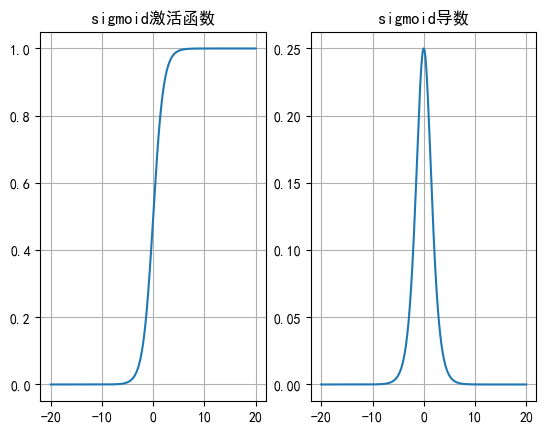

In [1]:
import torch
import matplotlib.pyplot as plt


plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

x = torch.linspace(start=-20, end=20, steps=1000)
y = torch.sigmoid(input=x)

_, axs = plt.subplots(1, 2)
axs[0].plot(x, y)
axs[0].grid()
axs[0].set_title("sigmoid激活函数")


x = torch.linspace(start=-20, end=20, steps=1000, requires_grad=True)
torch.sigmoid(x).sum().backward()
axs[1].plot(x.detach().numpy(), x.grad)
axs[1].grid()
axs[1].set_title("sigmoid导数")
plt.show()